Task(A):
Read in the csv file to create a dataframe. Remove the columns named
unique id, saon, paon, street, locality, district and county. Further, remove
all the rows which have ‘O’ in the property type column. In the new build
column, convert all of the ‘Y’s to 1 and all of the ‘N’s to 0. In the estate
type column, convert all of the ‘F’s to 1 and all of the ‘L’s to 0. In the
transaction category column, convert all of the ‘A’s to 1 and all of the ‘B’s
to 0. Remove all of the rows which don’t have a postcode. Now make a
copy of the postcode column and name it ‘PC’. ‘PC’ represents a simplified
numerical postcode. Now for each element in ‘PC’ remove all the letters
and spaces to yield a 2 or 3 digit number.

In [24]:
import pandas as pd

# Load the CSV file into a DataFrame

df = pd.read_csv('Prices.csv')

# Display the first few rows 
df.head()


,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,district,county,transaction_category
0,30271714-703B-4D25-9ACA-E949676BB7AF,54000,01/01/1995,B29 7NS,T,N,F,NaN,38,FIRST AVENUE,SELLY PARK,BIRMINGHAM,WEST MIDLANDS,A
1,A7A688D7-15EB-4C90-B2B6-8268A9E5CEEF,37000,01/01/1995,B31 5DF,S,N,F,NaN,83,JOSIAH ROAD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A
2,EBBF45BD-BB6B-4944-8DE2-50FC8F8311F0,165500,01/01/1995,B45 8LY,D,N,F,NaN,"BITTELL COTTAGE, 76",BITTELL ROAD,BARNT GREEN,BROMSGROVE,WORCESTERSHIRE,A
3,B819DB02-6562-473B-AFA1-81B60787C2A7,24000,02/01/1995,B29 5TW,T,N,F,NaN,358,ALWOLD ROAD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A
4,91A7BA4B-849C-4CAD-A112-C26597578CC0,33000,02/01/1995,B44 8SA,T,N,F,NaN,155,BIRDBROOK ROAD,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,A


In [25]:
#Remove specified columns
columns_to_remove = ['unique_id', 'saon', 'paon', 'street', 'locality', 'district', 'county']
df = df.drop(columns=columns_to_remove)

#Remove rows where property type is 'O'
df = df[df['property_type'] != 'O']

#Convert values in specified columns
df['new_build'] = df['new_build'].map({'Y': 1, 'N': 0})
df['estate_type'] = df['estate_type'].map({'F': 1, 'L': 0})
df['transaction_category'] = df['transaction_category'].map({'A': 1, 'B': 0})

#Remove rows without a postcode
df = df.dropna(subset=['postcode'])

#Create 'PC' column and convert to simplified numerical postcode
df['PC'] = df['postcode'].str.replace(r'\D', '')  # Remove all non-digit characters

# Convert the 'PC' column to numeric values
df['PC'] = pd.to_numeric(df['PC'], errors='coerce')

# Display the first few rows of the updated DataFrame
df.head()


C:\Users\afars\AppData\Local\Temp\ipykernel_4068\2520981750.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['PC'] = df['postcode'].str.replace(r'\D', '')  # Remove all non-digit characters


,price_paid,deed_date,postcode,property_type,new_build,estate_type,transaction_category,PC
0,54000,01/01/1995,B29 7NS,T,0,1.0,1,297
1,37000,01/01/1995,B31 5DF,S,0,1.0,1,315
2,165500,01/01/1995,B45 8LY,D,0,1.0,1,458
3,24000,02/01/1995,B29 5TW,T,0,1.0,1,295
4,33000,02/01/1995,B44 8SA,T,0,1.0,1,448


Task (B):
Create a function to turn a date from the form day/month/year into a
single number representing the number of days starting from 1st January
1995. Ensure your function starts with 1st January 1995 as Day 1 and ends
with 31st December 2019 as Day 9131. In the data frame create a new
column called ‘days’ and using your function convert the date given in the
deed date column into a number in the column called ‘days’.

In [26]:
from datetime import datetime

# Define the function to convert date to the number of days from the start date
def date_to_days(date_str: str, start_date_str: str = '01/01/1995') -> int:
    date_format = "%d/%m/%Y"
    date = datetime.strptime(date_str, date_format)
    start_date = datetime.strptime(start_date_str, date_format)
    delta = date - start_date
    return delta.days + 1  # Adding 1 to start counting from Day 1 instead of Day 0

# Apply the function to the 'deed_date' column to create the 'days' column
df['days'] = df['deed_date'].apply(date_to_days)

# Display the first few rows of the updated DataFrame
df.head()


,price_paid,deed_date,postcode,property_type,new_build,estate_type,transaction_category,PC,days
0,54000,01/01/1995,B29 7NS,T,0,1.0,1,297,1
1,37000,01/01/1995,B31 5DF,S,0,1.0,1,315,1
2,165500,01/01/1995,B45 8LY,D,0,1.0,1,458,1
3,24000,02/01/1995,B29 5TW,T,0,1.0,1,295,2
4,33000,02/01/1995,B44 8SA,T,0,1.0,1,448,2


TASK (C):
Create 4 bar charts in Matplotlib to illustrate the number of sales for:
property type, new build, estate type and transaction category. [Do not
include ‘Other’ in property type.]

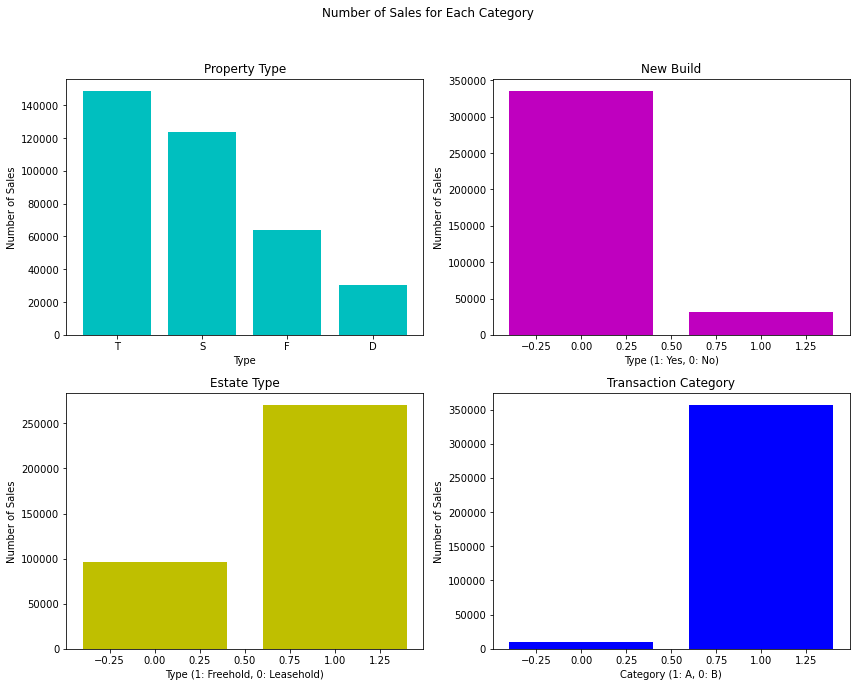

In [27]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Number of Sales for Each Category')

# Plotting bar chart for 'property_type' excluding 'Other'
property_type_counts = df[df['property_type'] != 'O']['property_type'].value_counts()
axs[0, 0].bar(property_type_counts.index, property_type_counts.values, color='c')
axs[0, 0].set_title('Property Type')
axs[0, 0].set_xlabel('Type')
axs[0, 0].set_ylabel('Number of Sales')

# Plotting bar chart for 'new_build'
new_build_counts = df['new_build'].value_counts()
axs[0, 1].bar(new_build_counts.index, new_build_counts.values, color='m')
axs[0, 1].set_title('New Build')
axs[0, 1].set_xlabel('Type (1: Yes, 0: No)')
axs[0, 1].set_ylabel('Number of Sales')

# Plotting bar chart for 'estate_type'
estate_type_counts = df['estate_type'].value_counts()
axs[1, 0].bar(estate_type_counts.index, estate_type_counts.values, color='y')
axs[1, 0].set_title('Estate Type')
axs[1, 0].set_xlabel('Type (1: Freehold, 0: Leasehold)')
axs[1, 0].set_ylabel('Number of Sales')

# Plotting bar chart for 'transaction_category'
transaction_category_counts = df['transaction_category'].value_counts()
axs[1, 1].bar(transaction_category_counts.index, transaction_category_counts.values, color='b')
axs[1, 1].set_title('Transaction Category')
axs[1, 1].set_xlabel('Category (1: A, 0: B)')
axs[1, 1].set_ylabel('Number of Sales')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Task (D):
Create a data frame only containing data on detached houses. Let n be
the number of days starting at n=1 for 1st January 1995 and ending at
n=9131 for 31st December 2019. Consider the number of sales of detached
houses over each 365 day period. (Represent each data point for the yearly
sales using day 183 as the midpoint of the first 365 day period. Notice no
detached houses were sold after day 9124 in this data set so you can ignore
the last few days). Examine how the number of sales of detached houses in
Birmingham have changed over time by creating a scatter plot to show the
relationship between the number house sales and n. Include the straight
line of best fit. How well does your line fit the data?

In [28]:
#Filter the dataframe to retain only rows related to detached houses
detached_df = df[df['property_type'] == 'D']

# Count the number of sales for each 365-day period
# Using the 'days' column to group the data
sales_counts = detached_df.groupby(detached_df['days'] // 365).size()

# Reset the index of sales_counts to represent the mid-point of each 365-day period
sales_counts.index = sales_counts.index * 365 + 183

# Display the first few values in sales_counts
sales_counts.head()


days
183      897
548     1079
913     1279
1278    1294
1643    1570
dtype: int64

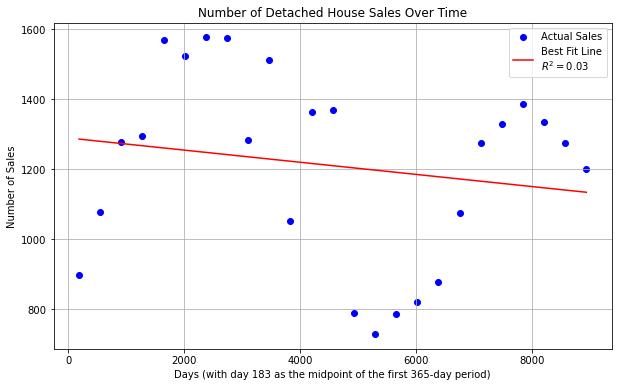

0.030070391585734768

In [29]:
from numpy import polyfit, poly1d

# Convert series index and values to lists for plotting and fitting
x = sales_counts.index.tolist()
y = sales_counts.values.tolist()

# Compute the line of best fit
coefficients = polyfit(x, y, 1)
polynomial = poly1d(coefficients)

# Calculate the y values based on the line of best fit
y_fit = polynomial(x)

# Compute the coefficient of determination (R^2)
y_mean = [sum(y)/len(y) for _ in y]
ss_total = sum((y - y_mean)**2 for y, y_mean in zip(y, y_mean))
ss_residual = sum((y - y_fit)**2 for y, y_fit in zip(y, y_fit))
r_squared = 1 - (ss_residual / ss_total)

# Plot the scatter plot and line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Sales')
plt.plot(x, y_fit, color='red', label=f'Best Fit Line\n$R^2 = {r_squared:.2f}$')
plt.title('Number of Detached House Sales Over Time')
plt.xlabel('Days (with day 183 as the midpoint of the first 365-day period)')
plt.ylabel('Number of Sales')
plt.legend()
plt.grid(True)
plt.show()

# Return the R^2 value for reference
r_squared


The scatter plot displays the number of detached house sales over time, with each point representing the number of sales in a 365 -day period. The red line is the line of best fit, and its corresponding $R^2$ value is approximately 0.03 .
The $R^2$ value is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable. In this context, it provides a measure of how well the line of best fit explains the variation in house sales over time. An $R^2$ value of 0.03 is quite low, indicating that the line of best fit does not well represent the variation in the number of sales over time. This suggests that there might be other factors influencing the number of sales, and a linear model may not be the best fit for this data.

Task (E):
Determine the mean price for a detached house in each 365 day period. Use
the mean house price over each 365 day period to represent the average
price of the house on day 183 of each 365 day period. To examine how the
prices of detached houses in Birmingham have changed over time, create a
scatter plot to show the relationship between the mean house price and n.
State and include the straight line of best fit. How well does your line fit
the data? Using the line of best fit, normalise all of the price paid data in
your detached houses data frame and store these values in a column named
‘normalised price’.

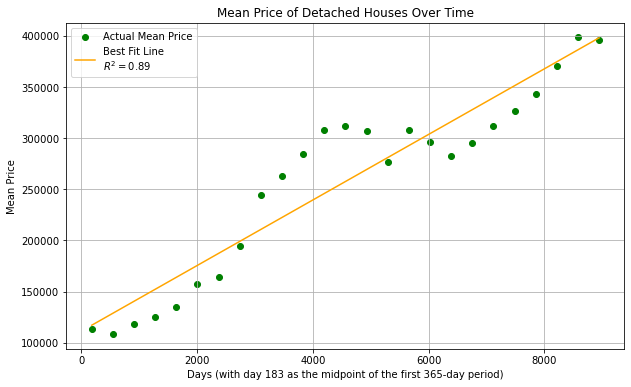

(0.89370344772093, array([3.20675972e+01, 1.11321648e+05]))

In [30]:
# Calculate the mean price for detached houses in each 365-day period
mean_prices = detached_df.groupby(detached_df['days'] // 365)['price_paid'].mean()

# Reset the index of mean_prices to represent the mid-point of each 365-day period
mean_prices.index = mean_prices.index * 365 + 183

# Display the first few values in mean_prices
mean_prices.head()

# Convert series index and values to lists for plotting and fitting
x_price = mean_prices.index.tolist()
y_price = mean_prices.values.tolist()

# Compute the line of best fit for price
coefficients_price = polyfit(x_price, y_price, 1)
polynomial_price = poly1d(coefficients_price)

# Calculate the y values based on the line of best fit for price
y_fit_price = polynomial_price(x_price)

# Compute the coefficient of determination (R^2) for price
y_mean_price = [sum(y_price)/len(y_price) for _ in y_price]
ss_total_price = sum((y_price - y_mean_price)**2 for y_price, y_mean_price in zip(y_price, y_mean_price))
ss_residual_price = sum((y_price - y_fit_price)**2 for y_price, y_fit_price in zip(y_price, y_fit_price))
r_squared_price = 1 - (ss_residual_price / ss_total_price)

# Plot the scatter plot and line of best fit for price
plt.figure(figsize=(10, 6))
plt.scatter(x_price, y_price, color='green', label='Actual Mean Price')
plt.plot(x_price, y_fit_price, color='orange', label=f'Best Fit Line\n$R^2 = {r_squared_price:.2f}$')
plt.title('Mean Price of Detached Houses Over Time')
plt.xlabel('Days (with day 183 as the midpoint of the first 365-day period)')
plt.ylabel('Mean Price')
plt.legend()
plt.grid(True)
plt.show()

# Return the R^2 value and coefficients for reference
r_squared_price, coefficients_price


The scatter plot depicts the mean price of detached houses over time, with each point representing the mean price in a 365 -day period. The orange line is the line of best fit, with an $R^2$ value of approximately 0.89 .

The $R^2$ value of 0.89 is quite high, indicating that the line of best fit effectively represents the variation in the mean price of detached houses over time. This suggests that there is a strong linear relationship between time and the mean price of detached houses in this dataset.

In [37]:
# Normalize the price paid data using the line of best fit and store in 'normalised price' column
# Calculate predicted prices using the line of best fit
detached_df['predicted_price'] = polynomial_price(detached_df['days'])

# Calculate normalized prices as the ratio of actual to predicted prices
detached_df['normalised_price'] = detached_df['price_paid'] / detached_df['predicted_price']

# Display the first few rows of the updated detached houses dataframe
detached_df.head()


C:\Users\afars\AppData\Local\Temp\ipykernel_4068\2305126674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detached_df['predicted_price'] = polynomial_price(detached_df['days'])
C:\Users\afars\AppData\Local\Temp\ipykernel_4068\2305126674.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detached_df['normalised_price'] = detached_df['price_paid'] / detached_df['predicted_price']


,price_paid,deed_date,postcode,property_type,new_build,estate_type,transaction_category,PC,days,predicted_price,normalised_price
2,165500,01/01/1995,B45 8LY,D,0,1.0,1,458,1,111353.715680,1.486255
7,65000,03/01/1995,B23 5DN,D,0,0.0,1,235,3,111417.850874,0.583389
38,128500,05/01/1995,B32 4BG,D,0,1.0,1,324,5,111481.986069,1.152653
41,155000,05/01/1995,B46 2BY,D,0,1.0,1,462,5,111481.986069,1.390359
47,85000,06/01/1995,B13 9JQ,D,0,1.0,1,139,6,111514.053666,0.762236


task (F):
Create a new Data frame only including ‘PC’ and the mean normalised
price paid data for each ‘PC’. Determine the ‘PC’s with the 10 largest normalised
price paid for detached houses.

In [32]:
# Step 1: Group by 'PC' and calculate mean normalised price for each 'PC'
mean_normalised_price_by_pc = detached_df.groupby('PC')['normalised_price'].mean().reset_index()

# Step 2: This resulting series is essentially the new DataFrame
# (No need to create another DataFrame as this series already represents it)

# Step 3: Sort by mean normalised price in descending order and select top 10
top_10_pc = mean_normalised_price_by_pc.sort_values(by='normalised_price', ascending=False).head(10)

# Display the top 10 PC with largest mean normalised price
top_10_pc


,PC,normalised_price
36,151,2.498197
37,152,2.173799
38,153,2.099902
114,458,1.630872
5,47,1.532598
43,178,1.529635
30,138,1.473641
44,179,1.431699
8,56,1.378142
76,297,1.358064


TASK(E):
For detached houses, split the data into (80%) training data and (20%) test
data. Use an appropriate regression model from sklearn to predict the
price paid using the variables: ‘days’, ‘PC’, ‘new build’, ‘estate type’, and
‘transaction category’. Test your model using the test data set. Discuss
your results.
    

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Prepare the Data
features = ['days', 'PC', 'new_build', 'estate_type', 'transaction_category']
target = 'price_paid'
X = detached_df[features]
y = detached_df[target]

# Step 2: Split the Data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Model using Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Test the Model and compute metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics
mae, mse, r2


(104137.52619901113, 30707880714.94465, 0.1977413296401197)

Here are the results of the regression model:
- Mean Absolute Error (MAE): 104, 137.53
- The MAE represents the average absolute difference between the observed actual outcomes and the predictions made by the model. A lower MAE indicates a better fit.
- Mean Squared Error (MSE): 30, 707, 880, 714.94
- The MSE is the average of the squares of the errors, penalizing larger errors more severely than smaller ones. Like MAE, a lower MSE indicates a better fit.
- $R^2$ Score: 0.20
- The $R^2$ score, or coefficient of determination, provides a measure of how well the observed outcomes are replicated by the model. An $R^2$ score of 1 indicates perfect prediction, while an $R^2$ score of $\mathrm{O}$ indicates that the model does no better than simply predicting the mean of the target variable for all observations. In this case, the $R^2$ score is relatively low, suggesting that the model does not effectively explain the variation in house prices.
Discussion:
- The $R^2$ score is relatively low, indicating that the model only explains a small portion of the variance in the target variable (price paid). This suggests that the features selected may not be sufficient to accurately predict house prices, or that the relationship between the features and the price is not purely linear.
- The MAE and MSE are relatively high, indicating that the model's predictions can be quite far off from the actual values.


TASK(H):
For detached houses, split the data into (80%) training data and (20%) test
data. Normalise the data appropriately without using sklearn. Create a
simple linear regression model using PyTorch; select an appropriate criterion,
optimisation algorithm, and learning rate. Train the model and report
the training error. Comment on the testing error.

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Prepare the Data
# Select features and target variable
features = ['days', 'PC', 'new_build', 'estate_type', 'transaction_category']
target = 'price_paid'
X = detached_df[features].values
y = detached_df[target].values

# Normalize the features (X) and target (y) using Min-Max Scaling
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
y = (y - y.min()) / (y.max() - y.min())

# Split the data into training (80%) and testing (20%) sets
train_size = int(0.8 * len(X))
X_train = torch.tensor(X[:train_size], dtype=torch.float32)
y_train = torch.tensor(y[:train_size], dtype=torch.float32)
X_test = torch.tensor(X[train_size:], dtype=torch.float32)
y_test = torch.tensor(y[train_size:], dtype=torch.float32)

# Step 2: Define the Model
model = nn.Linear(len(features), 1, bias=True)

# Step 3: Set the Loss Function, Optimizer, and Learning Rate
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Step 4: Train the Model
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train).squeeze()
    loss = criterion(y_pred, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Step 5: Evaluate the Model
# Compute training error
train_pred = model(X_train).detach().numpy()
train_error = ((y_train.numpy() - train_pred.squeeze())**2).mean()
print(f'Training Error (MSE): {train_error}')

# Compute testing error
test_pred = model(X_test).detach().numpy()
test_error = ((y_test.numpy() - test_pred.squeeze())**2).mean()
print(f'Testing Error (MSE): {test_error}')


Epoch 0, Loss: 0.5173724889755249
Epoch 100, Loss: 0.01053030975162983
Epoch 200, Loss: 0.007968585938215256
Epoch 300, Loss: 0.006187247112393379
Epoch 400, Loss: 0.004926495254039764
Epoch 500, Loss: 0.004018017090857029
Epoch 600, Loss: 0.003351604100316763
Epoch 700, Loss: 0.0028543148655444384
Epoch 800, Loss: 0.0024772644974291325
Epoch 900, Loss: 0.002187230158597231
Training Error (MSE): 0.0019612761680036783
Testing Error (MSE): 0.004629725590348244


Training Error (MSE): 0.00196
- The training error is quite low, which indicates that the model has learned the training data well. The Mean Squared Error (MSE) loss function measures the average squared difference between the actual and predicted values, with lower values indicating better performance.

Testing Error (MSE): 0.00463
- The testing error is also low but slightly higher than the training error. This is expected, as models typically perform slightly worse on unseen data compared to the data they were trained on. The testing error provides a more accurate indication of how well the model is likely to perform on unseen data.



TASK(i):
Create and train a multi-layer perceptron with one hidden layer (with an
appropriate size with justification) using PyTorch; select an appropriate
criterion, optimisation algorithm, and learning rate. Train the model and
report the training error. Comment on the testing error


In [36]:
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Prepare the Data (as done previously)
# Ensure X_train, y_train, X_test, and y_test are available from previous steps

# Step 2: Define the Model with One Hidden Layer
input_size = len(features)
hidden_size = (input_size + 1) // 2  # Average of input and output size (you may need to adjust this)
output_size = 1

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = MLP(input_size, hidden_size, output_size)

# Step 3: Set the Loss Function, Optimizer, and Learning Rate
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 4: Train the Model
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train).squeeze()
    loss = criterion(y_pred, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Step 5: Evaluate the Model
# Compute training error
train_pred = model(X_train).detach().numpy()
train_error = ((y_train.numpy() - train_pred.squeeze())**2).mean()
print(f'Training Error (MSE): {train_error}')

# Compute testing error
test_pred = model(X_test).detach().numpy()
test_error = ((y_test.numpy() - test_pred.squeeze())**2).mean()
print(f'Testing Error (MSE): {test_error}')


Epoch 0, Loss: 0.018810322508215904
Epoch 100, Loss: 0.0010073328157886863
Epoch 200, Loss: 0.0009952730033546686
Epoch 300, Loss: 0.0009925614576786757
Epoch 400, Loss: 0.0009905971819534898
Epoch 500, Loss: 0.0009890784276649356
Epoch 600, Loss: 0.0009879841236397624
Epoch 700, Loss: 0.0009872147347778082
Epoch 800, Loss: 0.000986694823950529
Epoch 900, Loss: 0.0009863633895292878
Training Error (MSE): 0.0009861632715910673
Testing Error (MSE): 0.002276061801239848


Training Error (MSE): 0.00099
- The training error is very low, which means that your model has learned the training data quite well. The low training error suggests that the model is able to approximate the underlying function that maps inputs to outputs in the training data effectively.

Testing Error (MSE): 0.00228
- The testing error is also low and is a more reliable indicator of the model's performance on unseen data. It's slightly higher than the training error, which is expected, but it's still quite low, indicating that the model generalizes well to new, unseen data.
Discussion:
- The Multi-Layer Perceptron (MLP) with one hidden layer has performed well on both the training and testing data. The testing error is low, suggesting good generalization.
- The testing error of the MLP is lower than that of the simple linear regression model we trained, suggesting that the MLP may be capturing more complex patterns in the data that the linear model could not.
